<a href="https://colab.research.google.com/github/yleessam/py_data_anal_lesson/blob/main/automobile_analysis_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        Import Needed Libraries
    </h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        Loading Dataset And Get Some Info
    </h1>
</div>

In [2]:
df = pd.read_csv('Automobile.csv')
df.sample(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
294,maxda glc deluxe,34.1,4,86.0,65.0,1975,15.2,79,japan
220,datsun f-10 hatchback,33.5,4,85.0,70.0,1945,16.8,77,japan
245,ford fiesta,36.1,4,98.0,66.0,1800,14.4,78,usa
247,datsun b210 gx,39.4,4,85.0,70.0,2070,18.6,78,japan
96,amc ambassador brougham,13.0,8,360.0,175.0,3821,11.0,73,usa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          398 non-null    object 
 1   mpg           398 non-null    float64
 2   cylinders     398 non-null    int64  
 3   displacement  398 non-null    float64
 4   horsepower    392 non-null    float64
 5   weight        398 non-null    int64  
 6   acceleration  398 non-null    float64
 7   model_year    398 non-null    int64  
 8   origin        398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df.corr()

<ipython-input-5-2f6f6606aa2c>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [6]:
df.shape

(398, 9)

### Check if there is any duplicate values

In [7]:
df.duplicated().value_counts()

False    398
dtype: int64

### Check if there is any null values

In [8]:
df.isnull().sum()

name            0
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

### we note that exist 6 null values in horsepower column so i replace these values with the mean of horsepower

In [9]:
df['horsepower'].fillna(df['horsepower'].mean(), inplace=True)
df.sample(5)

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
187,chevrolet chevelle malibu classic,17.5,8,305.0,140.0,4215,13.0,76,usa
45,amc hornet sportabout (sw),18.0,6,258.0,110.0,2962,13.5,71,usa
182,fiat 131,28.0,4,107.0,86.0,2464,15.5,76,europe
184,capri ii,25.0,4,140.0,92.0,2572,14.9,76,usa
41,plymouth fury iii,14.0,8,318.0,150.0,4096,13.0,71,usa


<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'name' column
    </h1>
</div>

In [10]:
df.name.nunique()

305

In [11]:
df.pivot_table(index="name")

<ipython-input-11-4bcb9e935b30>:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



,acceleration,cylinders,displacement,horsepower,model_year,mpg,weight
name,,,,,,,
amc ambassador brougham,11.00,8.0,360.0,175.0,73.0,13.00,3821.0
amc ambassador dpl,8.50,8.0,390.0,190.0,70.0,15.00,3850.0
amc ambassador sst,11.50,8.0,304.0,150.0,72.0,17.00,3672.0
amc concord,18.65,5.0,191.5,90.0,79.0,21.85,3106.5
amc concord d/l,15.10,6.0,258.0,120.0,78.0,18.10,3410.0
...,...,...,...,...,...,...,...
vw dasher (diesel),23.70,4.0,90.0,48.0,80.0,43.40,2335.0
vw pickup,24.60,4.0,97.0,52.0,82.0,44.00,2130.0
vw rabbit,14.45,4.0,94.0,73.0,78.0,35.25,2040.5


<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'mpg' column
    </h1>
</div>

In [12]:
df['mpg'].nunique()

129

### boxplot of mpg

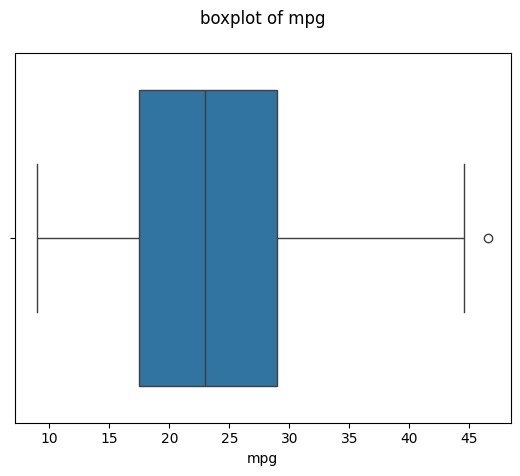

In [13]:
sns.boxplot(data=df,x='mpg')
plt.title('boxplot of mpg\n')
plt.show()

### find the outlier

In [14]:
q3 = 29
q1 = 17.5
iqr_mpg = q3-q1
upper_limit_mpg = q3 + (1.5*iqr_mpg)
upper_limit_mpg

46.25

In [15]:
df[df.mpg>upper_limit_mpg]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.6,4,86.0,65.0,2110,17.9,80,japan


### handle outlier in 'mpg'

In [16]:
df['mpg'] = df['mpg'].clip(upper=upper_limit_mpg)

In [17]:
df.mpg.value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64

### average value of mpg

In [18]:
df.mpg.mean()

23.513693467336687

### maximum value of mpg:

In [19]:
df['mpg'].max()

46.25

### car that has the max mpg

In [20]:
df[df.mpg==df.mpg.max()]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,mazda glc,46.25,4,86.0,65.0,2110,17.9,80,japan


### minmum value of mpg:

In [21]:
df['mpg'].min()

9.0

### car that has the min mpg

In [22]:
df[df.mpg==9.0]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
28,hi 1200d,9.0,8,304.0,193.0,4732,18.5,70,usa


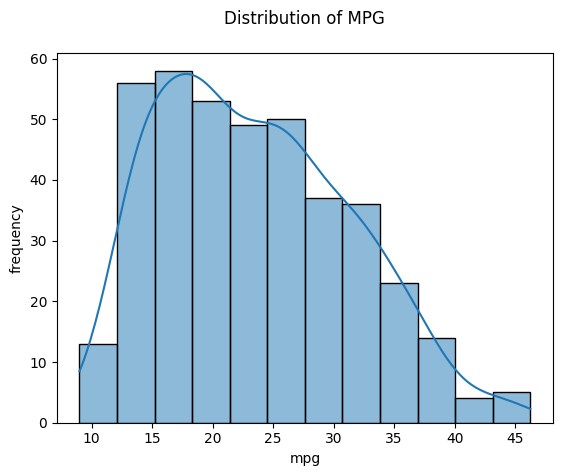

In [23]:
sns.histplot(data=df,x='mpg',kde=True)
plt.ylabel("frequency")
plt.xlabel('mpg')
plt.title('Distribution of MPG\n')
plt.show()

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'cylinders' column
    </h1>
</div>

In [24]:
df.cylinders.unique()

array([8, 4, 6, 3, 5])

### boxplot of cylinders

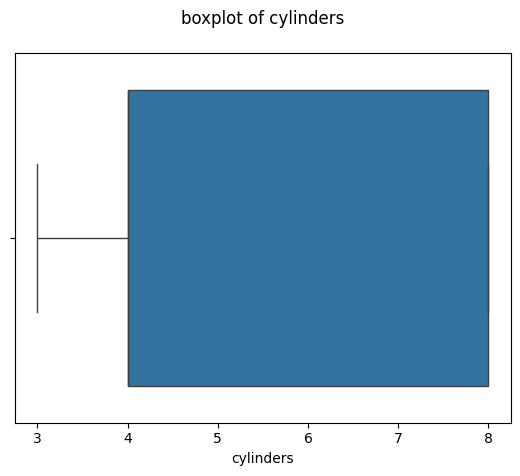

In [25]:
sns.boxplot(data=df,x='cylinders')
plt.title('boxplot of cylinders\n')
plt.show()

### The most common number of cylinders

In [26]:
df.cylinders.mode()[0]

4

In [27]:
numOfCylinders = df.cylinders.value_counts().reset_index().rename(columns={"index": "Cylinders", "cylinders": "Count"})
numOfCylinders

,Cylinders,Count
0,4,204
1,8,103
2,6,84
3,3,4
4,5,3


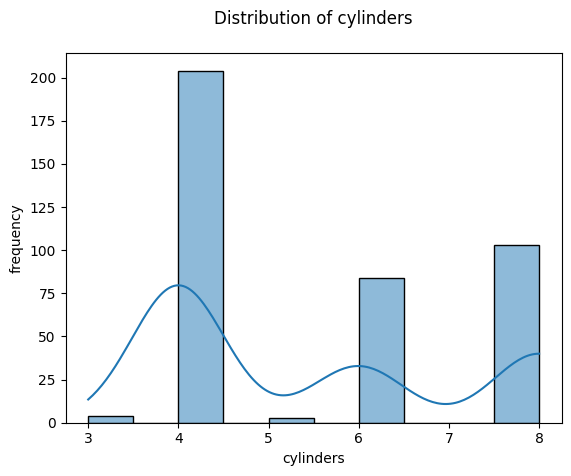

In [28]:
sns.histplot(data=df,x='cylinders',kde=True)
plt.ylabel("frequency")
plt.xlabel('cylinders')
plt.title('Distribution of cylinders\n')
plt.show()

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'displacement' column
    </h1>
</div>

In [29]:
df.displacement.nunique()

82

In [30]:
df.displacement.mean()

193.42587939698493

### Car that has max displacement

In [31]:
max_displacement = df[df['displacement'] == df['displacement'].max()]
max_displacement

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
13,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,usa
95,buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,usa


### Car that has min displacement

In [32]:
min_displacement = df[df['displacement'] == df['displacement'].min()]
min_displacement

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
117,fiat 128,29.0,4,68.0,49.0,1867,19.5,73,europe


### boxplot of displacement

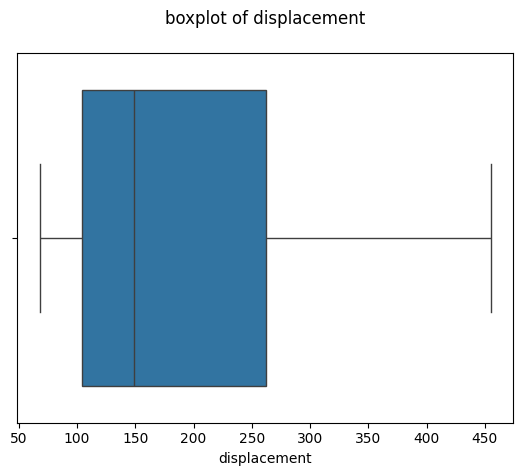

In [33]:
sns.boxplot(data=df,x='displacement')
plt.title('boxplot of displacement\n')
plt.show()

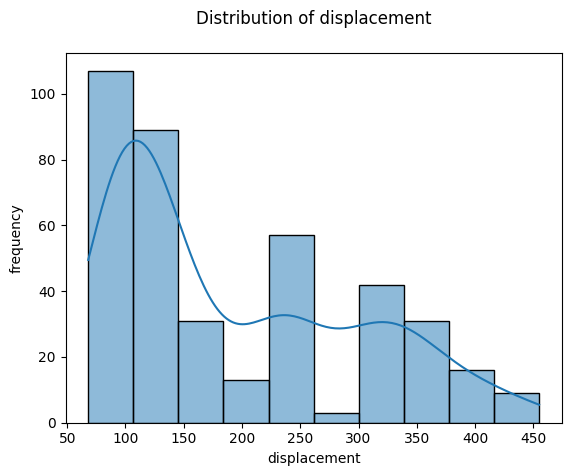

In [34]:
sns.histplot(data=df,x='displacement',kde=True)
plt.ylabel("frequency")
plt.xlabel('displacement')
plt.title('Distribution of displacement\n')
plt.show()

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'horsepower' column
    </h1>
</div>

In [35]:
df.horsepower.nunique()

94

### boxplot of horsepower

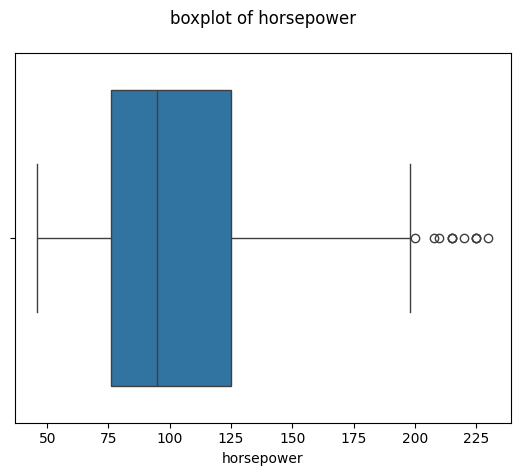

In [36]:
sns.boxplot(data=df,x='horsepower')
plt.title('boxplot of horsepower\n')
plt.show()

### find the outliers

In [37]:
df.horsepower.describe()

count    398.000000
mean     104.469388
std       38.199187
min       46.000000
25%       76.000000
50%       95.000000
75%      125.000000
max      230.000000
Name: horsepower, dtype: float64

In [38]:
iqr_horsepower = 125-76
upper_limit_hp =125 + (1.5*iqr_horsepower)
df[df.horsepower> upper_limit_hp]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
6,chevrolet impala,14.0,8,454.0,220.0,4354,9.0,70,usa
7,plymouth fury iii,14.0,8,440.0,215.0,4312,8.5,70,usa
8,pontiac catalina,14.0,8,455.0,225.0,4425,10.0,70,usa
13,buick estate wagon (sw),14.0,8,455.0,225.0,3086,10.0,70,usa
25,ford f250,10.0,8,360.0,215.0,4615,14.0,70,usa
26,chevy c20,10.0,8,307.0,200.0,4376,15.0,70,usa
27,dodge d200,11.0,8,318.0,210.0,4382,13.5,70,usa
67,mercury marquis,11.0,8,429.0,208.0,4633,11.0,72,usa
94,chrysler new yorker brougham,13.0,8,440.0,215.0,4735,11.0,73,usa
95,buick electra 225 custom,12.0,8,455.0,225.0,4951,11.0,73,usa


### handle outliers in 'horsepower'

In [39]:
df['horsepower'] = df['horsepower'].clip(upper=upper_limit_hp)

### Car with the highest horsepower

In [40]:
df[df.horsepower==df.horsepower.max()]['name'].values[0]

'chevrolet impala'

### Car with the lowest horsepower

In [41]:
df[df.horsepower==df.horsepower.min()]['name'].values[0]

'volkswagen 1131 deluxe sedan'

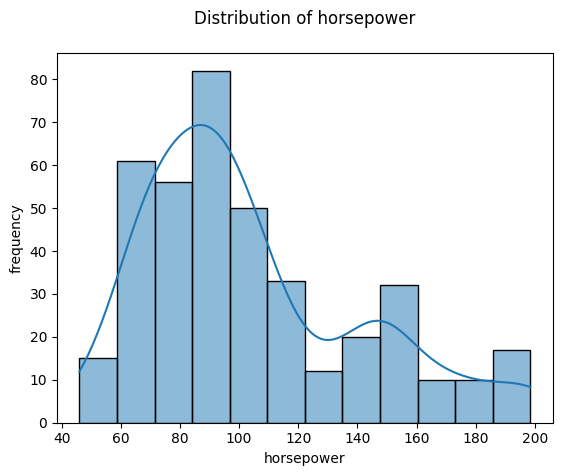

In [42]:
sns.histplot(data=df,x='horsepower',kde=True)
plt.ylabel("frequency")
plt.xlabel('horsepower')
plt.title('Distribution of horsepower\n')
plt.show()

In [43]:
top10_horsepower = df.horsepower.value_counts().head(10).reset_index().rename(columns={'index':'horsepower','horsepower':'count'})
top10_horsepower

,horsepower,count
0,150.0,22
1,90.0,20
2,88.0,19
3,110.0,18
4,100.0,17
5,75.0,14
6,95.0,14
7,105.0,12
8,70.0,12
9,67.0,12


<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'weight' column
    </h1>
</div>

In [44]:
df.weight.mean()

2970.424623115578

### boxplot of weight

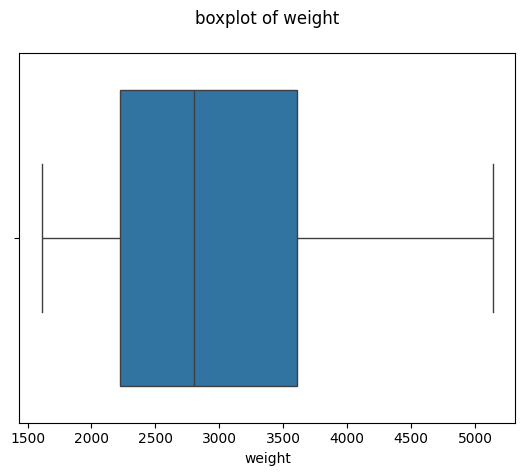

In [45]:
sns.boxplot(data=df,x='weight')
plt.title('boxplot of weight\n')
plt.show()

### Car that has max weight

In [46]:
max_weight = df[df.weight == df.weight.max()]
max_weight

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
44,pontiac safari (sw),13.0,8,400.0,175.0,5140,12.0,71,usa


### Car that has min weight

In [47]:
min_weight = df[df.weight == df.weight.min()]
min_weight

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
54,datsun 1200,35.0,4,72.0,69.0,1613,18.0,71,japan


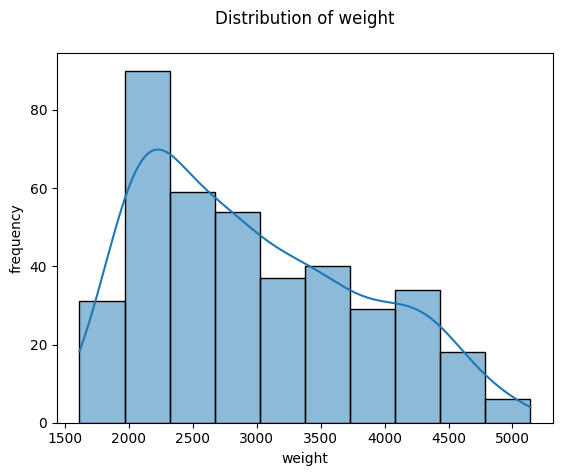

In [48]:
sns.histplot(data=df,x='weight',kde=True)
plt.ylabel("frequency")
plt.xlabel('weight')
plt.title('Distribution of weight\n')
plt.show()

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'acceleration' column
    </h1>
</div>

In [49]:
df['acceleration'].nunique()

95

### boxplot of acceleration

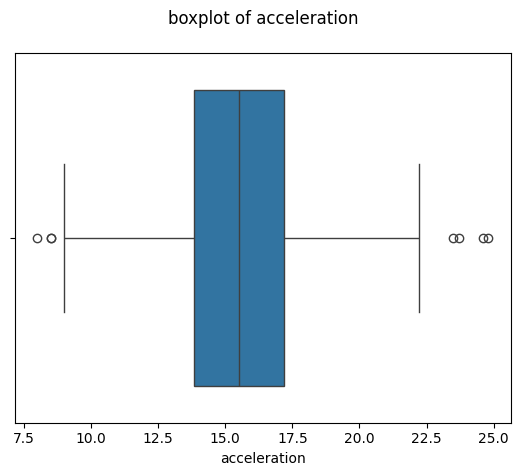

In [50]:
sns.boxplot(data=df,x='acceleration')
plt.title('boxplot of acceleration\n')
plt.show()

### find the outliers

In [51]:
df.acceleration.describe()

count    398.000000
mean      15.568090
std        2.757689
min        8.000000
25%       13.825000
50%       15.500000
75%       17.175000
max       24.800000
Name: acceleration, dtype: float64

In [52]:
# Upper limit
iqr_acc = 17.175000 - 13.825000
upper_limit_acc = 17.175000 + (1.5*iqr_acc)
df[df.acceleration>upper_limit_acc]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
59,volkswagen type 3,23.0,4,97.0,54.0,2254,23.5,72,europe
299,peugeot 504,27.2,4,141.0,71.0,3190,24.8,79,europe
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,23.7,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,europe


In [53]:
# Lower limit
lower_limit_acc = 13.825000 - (1.5*iqr_acc)
df[df.acceleration< lower_limit_acc]

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
7,plymouth fury iii,14.0,8,440.0,198.5,4312,8.5,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.5,70,usa
11,plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.0,70,usa


### handle outliers in 'acceleration'

In [54]:
df['acceleration'] = df['acceleration'].clip(lower=lower_limit_acc, upper=upper_limit_acc)

### Cars that has max acceleration

In [55]:
max_acceleration = df[df.acceleration == df.acceleration.max()]
max_acceleration

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
59,volkswagen type 3,23.0,4,97.0,54.0,2254,22.2,72,europe
299,peugeot 504,27.2,4,141.0,71.0,3190,22.2,79,europe
326,vw dasher (diesel),43.4,4,90.0,48.0,2335,22.2,80,europe
394,vw pickup,44.0,4,97.0,52.0,2130,22.2,82,europe


### Cars that has min acceleration

In [56]:
min_acceleration = df[df.acceleration == df.acceleration.min()]
min_acceleration

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
7,plymouth fury iii,14.0,8,440.0,198.5,4312,8.8,70,usa
9,amc ambassador dpl,15.0,8,390.0,190.0,3850,8.8,70,usa
11,plymouth 'cuda 340,14.0,8,340.0,160.0,3609,8.8,70,usa


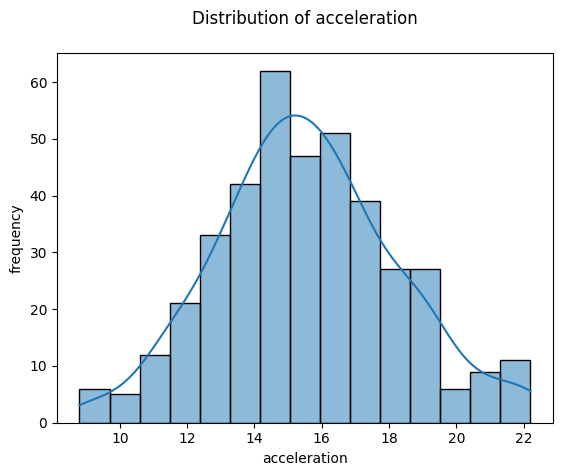

In [57]:
sns.histplot(data=df,x='acceleration',kde=True)
plt.ylabel("frequency")
plt.xlabel('acceleration')
plt.title('Distribution of acceleration\n')
plt.show()

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'model_year' column
    </h1>
</div>

In [58]:
df.model_year.nunique()

13

In [59]:
df.model_year.value_counts().reset_index().rename(columns={'index':'model_year','model_year':'count'})

,model_year,count
0,73,40
1,78,36
2,76,34
3,82,31
4,75,30
5,70,29
6,79,29
7,80,29
8,81,29
9,71,28


### boxplot of model_year

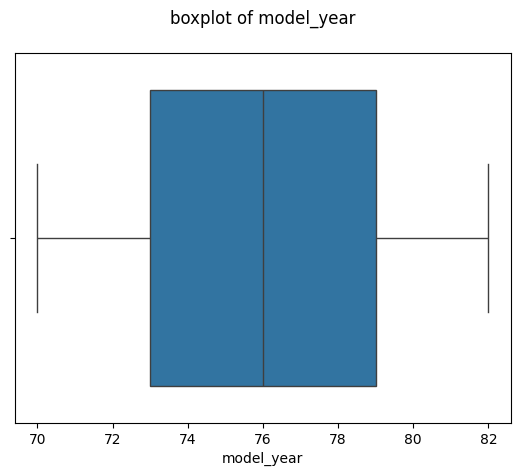

In [60]:
sns.boxplot(data=df,x='model_year')
plt.title('boxplot of model_year\n')
plt.show()

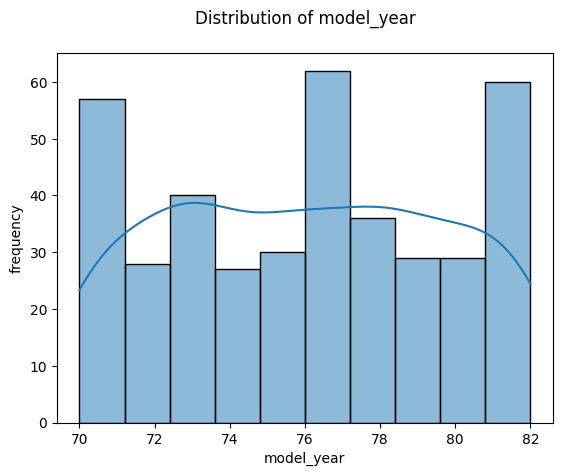

In [61]:
sns.histplot(data=df,x='model_year',kde=True)
plt.ylabel("frequency")
plt.xlabel('model_year')
plt.title('Distribution of model_year\n')
plt.show()

<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        'origin' column
    </h1>
</div>

In [62]:
df['origin'].nunique()

3

In [63]:
origins = df['origin'].value_counts().reset_index().rename(columns={'index':'origin','origin':'count'})
origins

,origin,count
0,usa,249
1,japan,79
2,europe,70


<div style="color:#e1e6ed;
            display:fill;
            border-radius:15px;
            background-color:#2b4266;
            font-size:80%;
            font-family:Verdana;
            letter-spacing:1px">
    <h1 style='padding: 20px;
              color:#e1e6ed;
              text-align:center;'>
        Ask Questions & Get Insights
    </h1>
</div>

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is distribution of 'origin'?</b>
</div>

<Axes: ylabel='origin'>

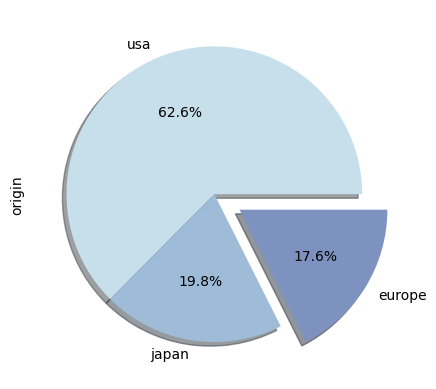

In [64]:
df.origin.value_counts().plot(kind="pie",autopct="%0.1f%%",explode=[0,0,0.2],shadow=True,
                              colors=sns.color_palette("ch:s=.25,rot=-.25"))

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>Identify the years with the highest and lowest acceleration rates</b>
</div>

In [65]:
year_highest_acceleration = max_acceleration['model_year'].values[0]
year_lowest_acceleration = min_acceleration['model_year'].values[0]
print("Year with Highest Acceleration:", year_highest_acceleration)
print("Year with Lowest Acceleration:", year_lowest_acceleration)

Year with Highest Acceleration: 72
Year with Lowest Acceleration: 70


<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is the average 'mpg' for each number of cylinders</b>
</div>

In [66]:
average_mpg_cylinders = df.groupby(['cylinders'])['mpg'].mean()
average_mpg_cylinders

cylinders
3    20.550000
4    29.285049
5    27.366667
6    19.985714
8    14.963107
Name: mpg, dtype: float64

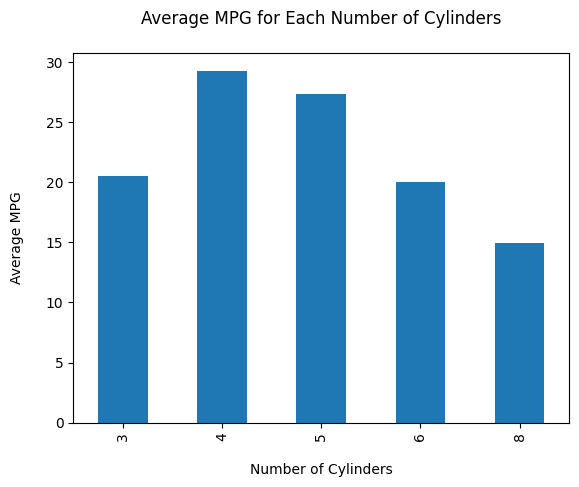

In [67]:
average_mpg_cylinders.plot(kind='bar')
plt.xlabel('\nNumber of Cylinders')
plt.ylabel('Average MPG\n')
plt.title('Average MPG for Each Number of Cylinders\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>The trend of 'mpg' over the years</b>
</div>

In [68]:
mpg_year = df.groupby(['model_year'])['mpg'].mean()
mpg_year

model_year
70    17.689655
71    21.250000
72    18.714286
73    17.100000
74    22.703704
75    20.266667
76    21.573529
77    23.375000
78    24.061111
79    25.093103
80    33.684483
81    30.334483
82    31.709677
Name: mpg, dtype: float64

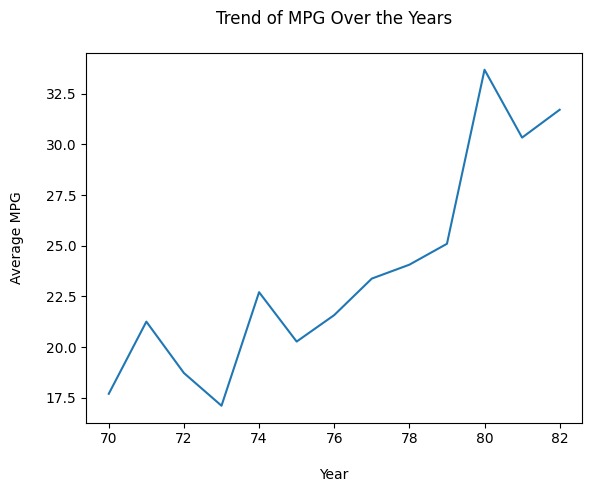

In [69]:
mpg_year.plot(kind='line')
plt.xlabel('\nYear')
plt.ylabel('Average MPG\n')
plt.title('Trend of MPG Over the Years\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>Horsepower vs. Weight (Colored by Origin)</b>
</div>

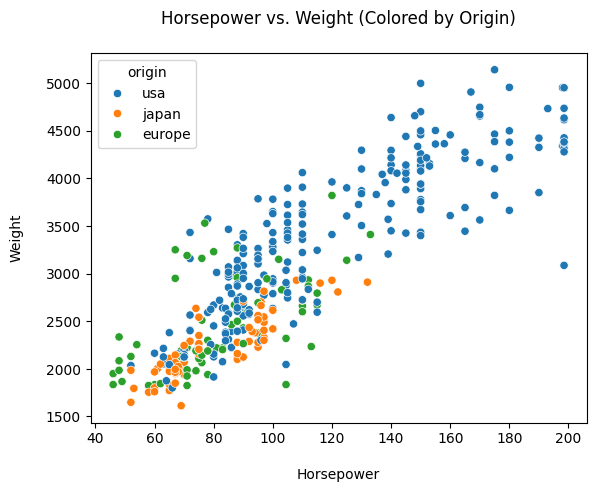

In [70]:
sns.scatterplot(x='horsepower', y='weight', hue='origin', data=df)
plt.xlabel('\nHorsepower')
plt.ylabel('Weight\n')
plt.title('Horsepower vs. Weight (Colored by Origin)\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>Is there a correlation between 'weight' and 'mpg'?</b>
</div>


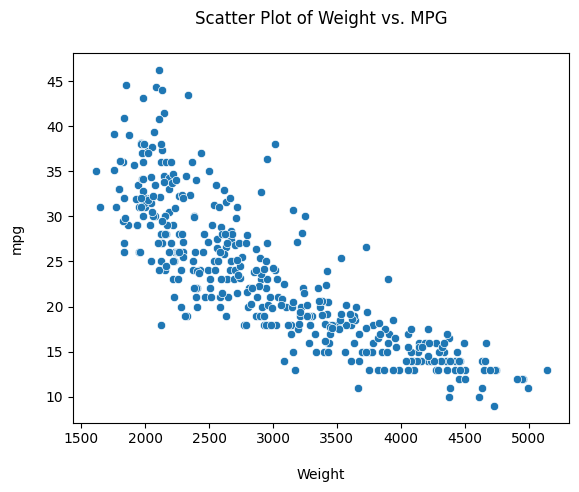

Correlation between MPG and Horsepower: -0.8319014310582458


In [71]:
sns.scatterplot(x='weight', y='mpg', data=df)
plt.xlabel('\nWeight')
plt.ylabel('mpg\n')
plt.title('Scatter Plot of Weight vs. MPG\n')
plt.show()

correlation = df['weight'].corr(df['mpg'])
print("Correlation between MPG and Horsepower:", correlation)

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is the distribution of the number of cylinders?</b>
</div>

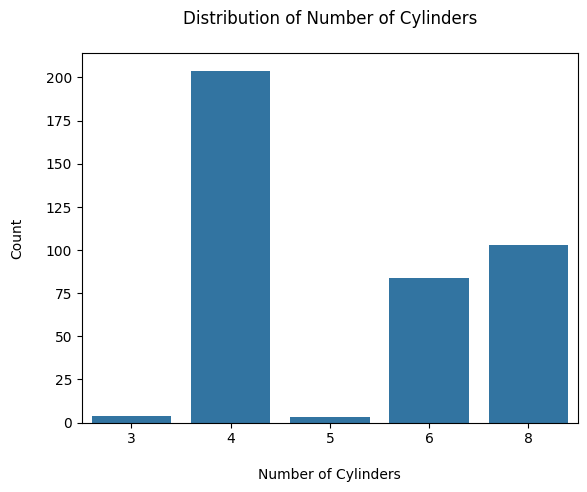

In [72]:
sns.countplot(x='cylinders', data=df)
plt.xlabel('\nNumber of Cylinders')
plt.ylabel('Count\n')
plt.title('Distribution of Number of Cylinders\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>Is there a correlation between 'mpg' and 'horsepower'?</b>
</div>

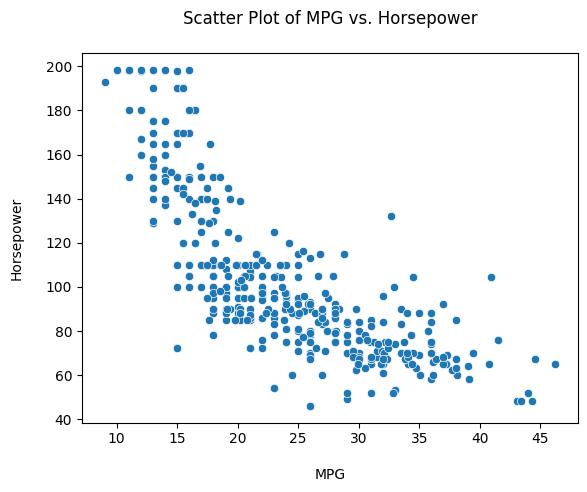

Correlation between MPG and Horsepower: -0.7837272704380656


In [73]:
sns.scatterplot(x='mpg', y='horsepower', data=df)
plt.xlabel('\nMPG')
plt.ylabel('Horsepower\n')
plt.title('Scatter Plot of MPG vs. Horsepower\n')
plt.show()

correlation = df['mpg'].corr(df['horsepower'])
print("Correlation between MPG and Horsepower:", correlation)

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>How does the average 'mpg' vary across different years and origins?</b>
</div>

In [74]:
average_mpg_year_origin = df.groupby(['model_year', 'origin'])['mpg'].mean().unstack()
average_mpg_year_origin

origin,europe,japan,usa
model_year,,,
70,25.200000,25.500000,15.272727
71,28.750000,29.500000,18.100000
72,22.000000,24.200000,16.277778
73,24.000000,20.000000,15.034483
74,27.000000,29.333333,18.333333
75,24.500000,27.500000,17.550000
76,24.250000,28.000000,19.431818
77,29.250000,27.416667,20.722222
78,24.950000,29.687500,21.772727


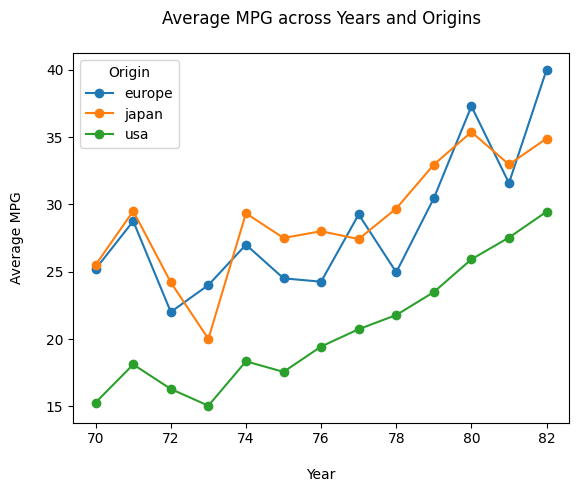

In [75]:
average_mpg_year_origin.plot(marker='o')
plt.xlabel('\nYear')
plt.ylabel('Average MPG\n')
plt.title('Average MPG across Years and Origins\n')
plt.legend(title='Origin')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>How does the average 'mpg' differ for cars from different origins?</b>
</div>

In [76]:
average_mpg_origin = df.groupby(['origin'])['mpg'].mean()
average_mpg_origin

origin
europe    27.891429
japan     30.446203
usa       20.083534
Name: mpg, dtype: float64

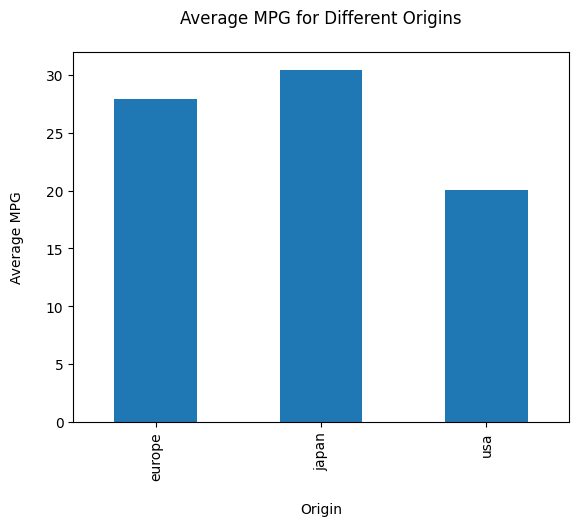

In [77]:
average_mpg_origin.plot(kind='bar')
plt.xlabel('\nOrigin')
plt.ylabel('Average MPG\n')
plt.title('Average MPG for Different Origins\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>Top 10 'horsepower'</b>
</div>

In [78]:
top10_horsepower

,horsepower,count
0,150.0,22
1,90.0,20
2,88.0,19
3,110.0,18
4,100.0,17
5,75.0,14
6,95.0,14
7,105.0,12
8,70.0,12
9,67.0,12


Text(0.5, 1.0, 'Top 10 horsepower\n')

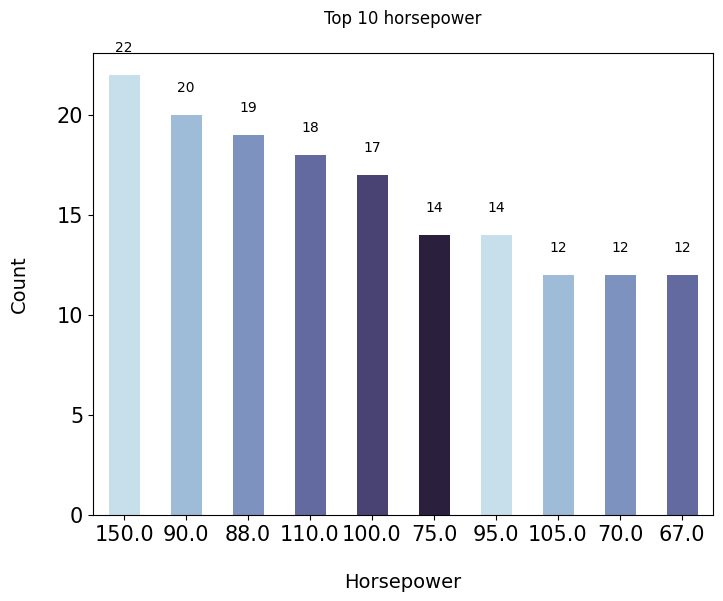

In [79]:
plt.figure(figsize = (8, 6))
ax = df["horsepower"].value_counts().head(10).plot(kind = 'bar', color = sns.color_palette("ch:s=.25,rot=-.25"), rot = 0)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)

plt.xlabel('Horsepower', fontsize = 14, labelpad = 20)
plt.ylabel('Count', fontsize = 14, labelpad = 20);
plt.title('Top 10 horsepower\n')

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>How does the average 'mpg' vary for cars with different numbers of cylinders and origins?</b>
</div>

In [80]:
average_mpg_cyl_origin = df.groupby(['cylinders', 'origin'])['mpg'].mean().unstack()
average_mpg_cyl_origin

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.590580,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


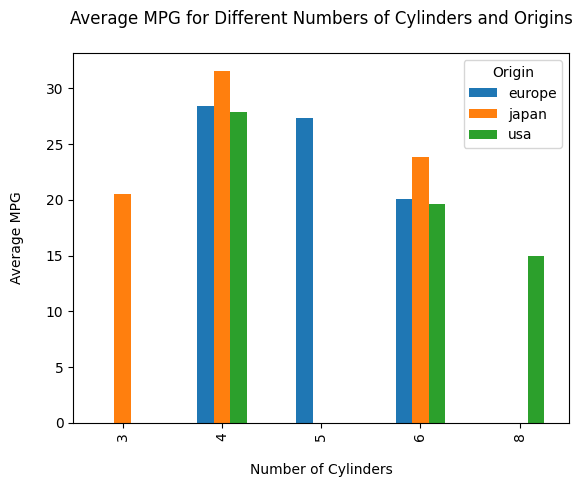

In [81]:
average_mpg_cyl_origin.plot(kind='bar')
plt.xlabel('\nNumber of Cylinders')
plt.ylabel('Average MPG\n')
plt.title('Average MPG for Different Numbers of Cylinders and Origins\n')
plt.legend(title='Origin')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is the average horsepower for cars from different origins and with different numbers of cylinders?</b>
</div>

In [82]:
average_hp_origin_cyl = df.groupby(['origin', 'cylinders'])['horsepower'].mean().unstack()
average_hp_origin_cyl

cylinders,3,4,5,6,8
origin,,,,,
europe,NaN,79.141885,82.333333,113.500000,NaN
japan,99.25,75.579710,NaN,115.833333,NaN
usa,NaN,81.936224,NaN,99.736073,156.315534


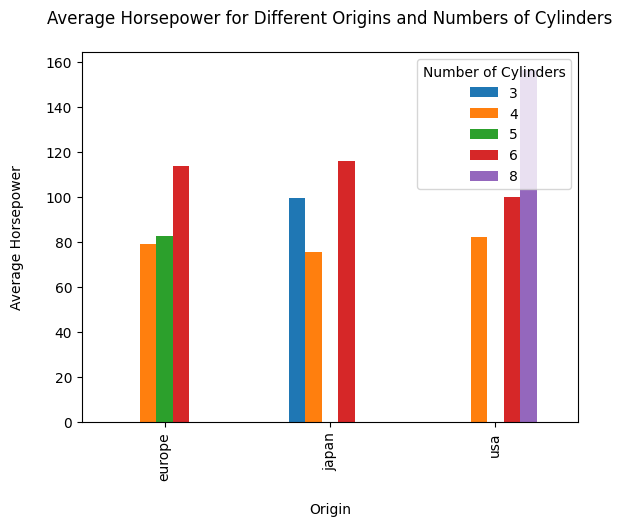

In [83]:
average_hp_origin_cyl = df.groupby(['origin', 'cylinders'])['horsepower'].mean().unstack()
average_hp_origin_cyl.plot(kind='bar')
plt.xlabel('\nOrigin')
plt.ylabel('Average Horsepower\n')
plt.title('Average Horsepower for Different Origins and Numbers of Cylinders\n')
plt.legend(title='Number of Cylinders')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>what are top 10 cars with highest average MPG</b>
</div>

In [84]:
average_mpg_model = df.groupby(['name'])['mpg'].mean().sort_values(ascending=False)
top_10_mpg_model = average_mpg_model.head(10)
top_10_mpg_model

name
mazda glc                          46.25
honda civic 1500 gl                44.60
vw rabbit c (diesel)               44.30
vw pickup                          44.00
vw dasher (diesel)                 43.40
volkswagen rabbit custom diesel    43.10
renault lecar deluxe               40.90
datsun b210 gx                     39.40
toyota starlet                     39.10
plymouth champ                     39.00
Name: mpg, dtype: float64

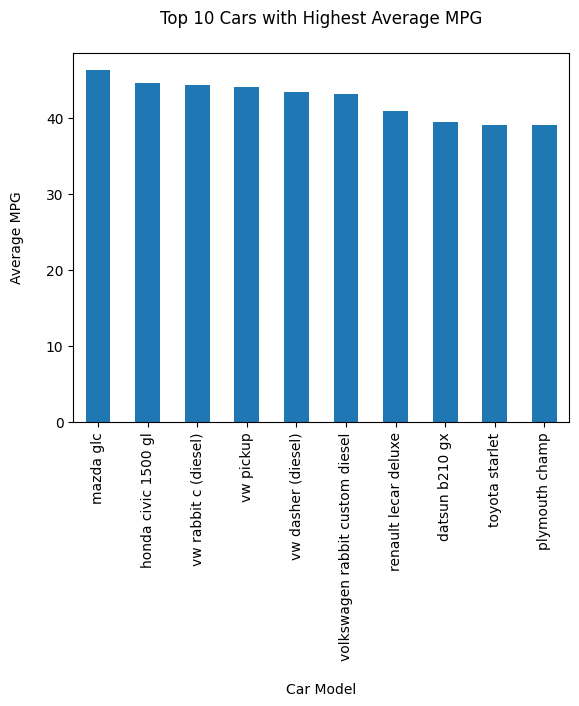

In [85]:
top_10_mpg_model.plot(kind='bar')
plt.xlabel('\nCar Model')
plt.ylabel('Average MPG\n')
plt.title('Top 10 Cars with Highest Average MPG\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is a relationship between 'mpg' and 'displacement' for cars with different numbers of cylinders?</b>
</div>

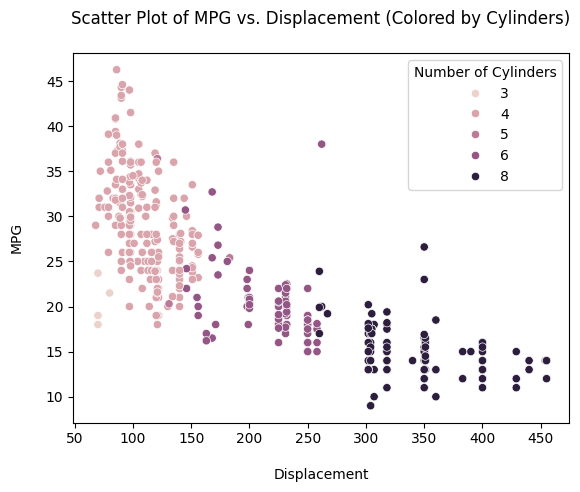

In [86]:
sns.scatterplot(x='displacement', y='mpg', hue='cylinders', data=df)
plt.xlabel('\nDisplacement')
plt.ylabel('MPG\n')
plt.title('Scatter Plot of MPG vs. Displacement (Colored by Cylinders)\n')
plt.legend(title='Number of Cylinders',loc = "best")
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is average MPG for different weight ranges?</b>
</div>

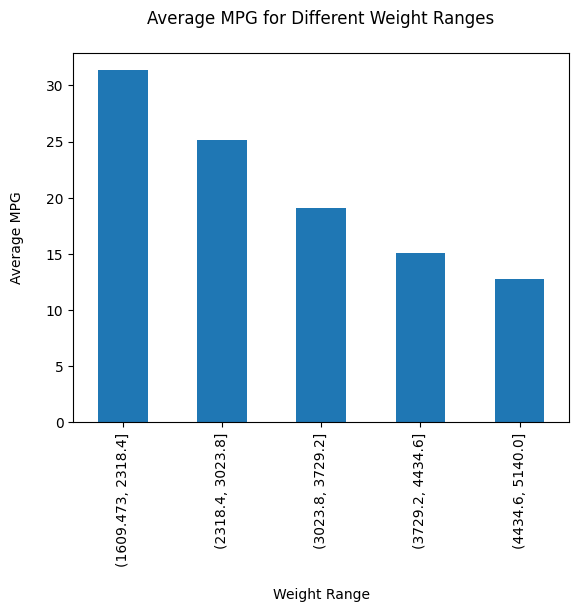

In [87]:
weight_bins = pd.cut(df['weight'], bins=5)
average_mpg_weight_range = df.groupby(weight_bins)['mpg'].mean()
average_mpg_weight_range.plot(kind='bar')
plt.xlabel('\nWeight Range')
plt.ylabel('Average MPG\n')
plt.title('Average MPG for Different Weight Ranges\n')
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>what is a relationship between 'mpg' and 'acceleration' for cars with different numbers of cylinders?</b>
</div>

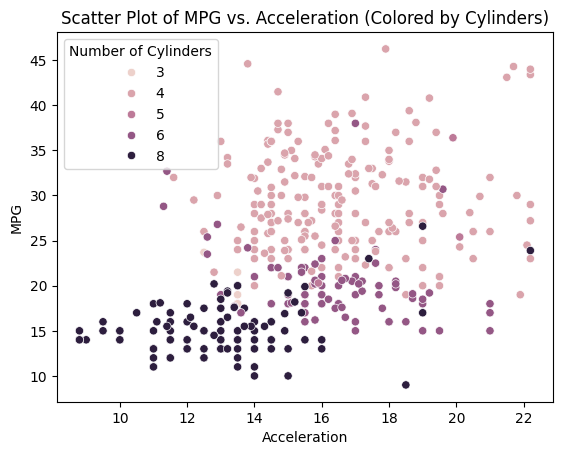

In [88]:
sns.scatterplot(x='acceleration', y='mpg', hue='cylinders', data=df)
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.title('Scatter Plot of MPG vs. Acceleration (Colored by Cylinders)')
plt.legend(title='Number of Cylinders',loc = "best")
plt.show()

<div style="padding:10px;
            color:#e1e6ed;
            margin:10px;
            font-size:130%;
            display:inline-block;
            border-radius:5px;
            border-style: solid;
            border-color: #aab2bd;
            background-color:#2b4266;
            overflow:hidden;
            font-weight:400"><b>What is the correlation between 'mpg' and ['cylinders', 'displacement', 'weight', 'acceleration'] ?</b>
</div>

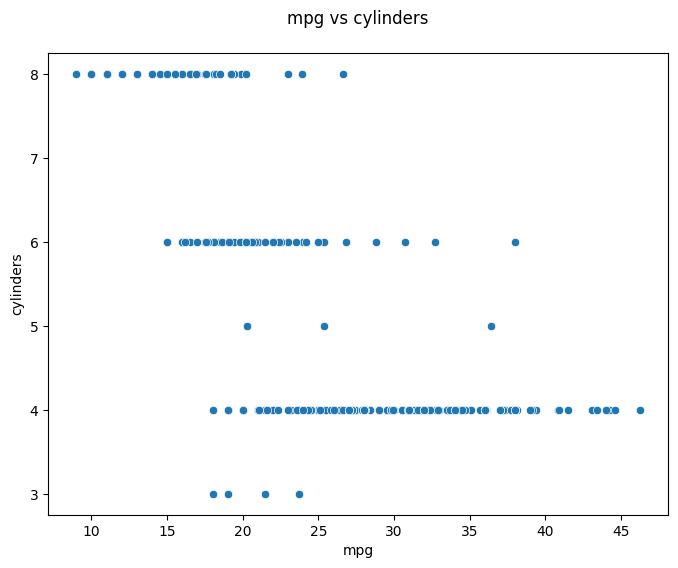

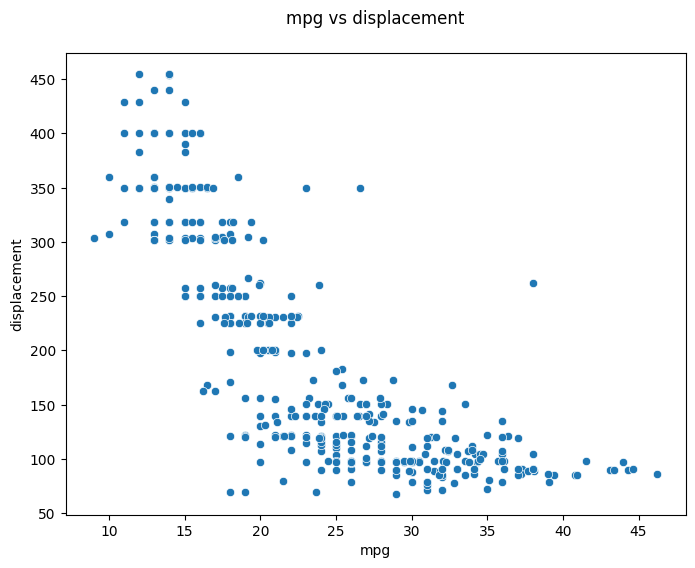

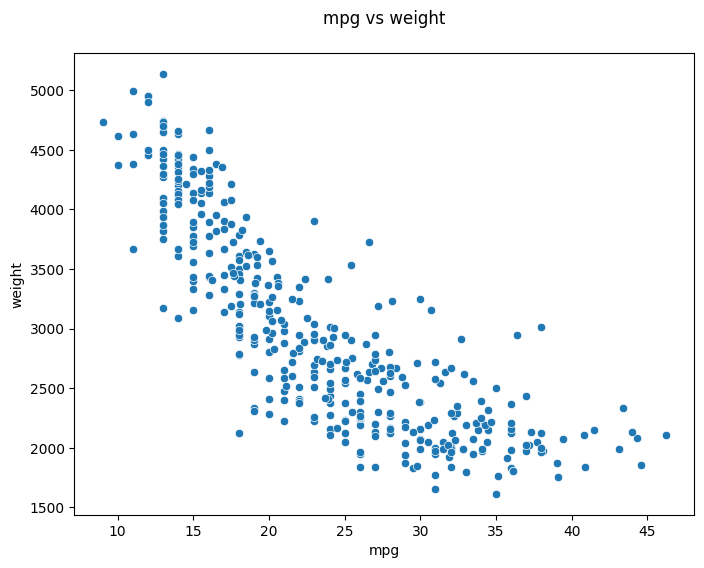

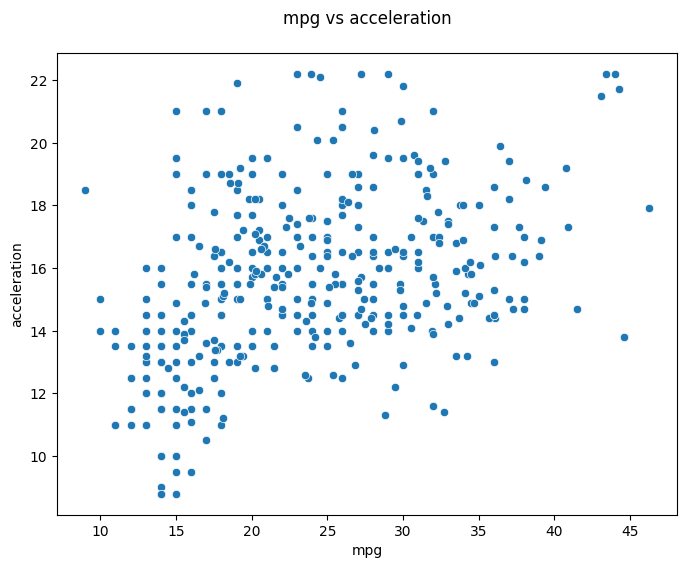

In [89]:
mpg_cols = ['cylinders', 'displacement', 'weight', 'acceleration']
for mpg_col in mpg_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='mpg', y=f'{mpg_col}')
    plt.title(f"mpg vs {mpg_col}\n")
    plt.show()